## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [1]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image


Pretty printing has been turned OFF


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

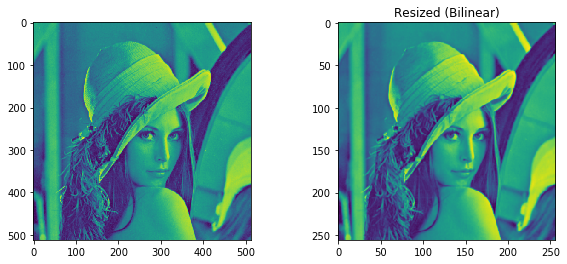

In [18]:
import skimage
image_path = './images/'
image_name='lena-grey.bmp'
lena_im=io.imread(image_path.__add__(image_name))
lena_im_float = skimage.img_as_float(lena_im)


#Bilinear Interpolation

new_size = 50 # 50 percent of current size

resized_lena = misc.imresize (lena_im , new_size , interp="bilinear" )

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax0, ax1 = axes.ravel()

ax0.imshow(lena_im)
plt.title("Original")

ax1.imshow(resized_lena)
plt.title("Resized (Bilinear)")




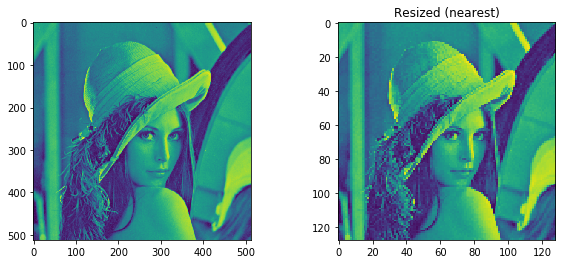

In [20]:
new_size = 25 # 25 percent of current size

resized_lena = misc.imresize (lena_im , new_size , interp="nearest" )

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax0, ax1 = axes.ravel()

ax0.imshow(lena_im)


ax1.imshow(resized_lena)
plt.title("Resized (nearest)")

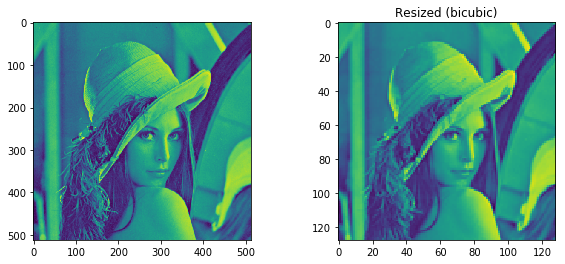

In [21]:
#Bicubic Interpolation

new_size =25 # 75 percent of current size
resized_lena = misc.imresize (lena_im , new_size , interp="bicubic" )

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax0, ax1 = axes.ravel()

ax0.imshow(lena_im)


ax1.imshow(resized_lena)
plt.title("Resized (bicubic)")


**Q.2 Write three functions that performs `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


In [132]:
image_name='apple.jpeg'
apple =io.imread(image_path.__add__(image_name),as_grey=True)
apple = skimage.img_as_float(apple)

image_name1='orange.jpeg'
orange =io.imread(image_path.__add__(image_name1),as_grey=True)
orange = skimage.img_as_float(orange)

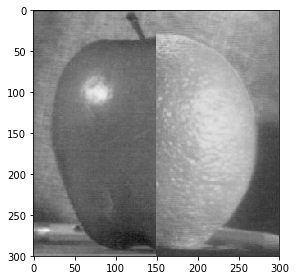

In [133]:
# simple blend
def simpleBlend(img1 ,img2):
    simplyBlended = np.zeros_like(img1)

    row = np.shape(simplyBlended)[0]
    col = np.shape(simplyBlended)[1]

    simplyBlended[:,:col/2] = img1[:,:col/2]
    simplyBlended[:,col/2:] = img2[:,col/2:]

    io.imshow(simplyBlended)

simpleBlend(apple,orange)

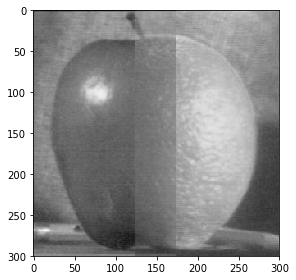

In [141]:
#alpha blend


def alphaBlend(img1,img2, window):  
    
    simplyBlended = np.zeros_like(img1)
    row = np.shape(simplyBlended)[0]
    col = np.shape(simplyBlended)[1]

    x1 = int(col/2) - window
    x2 = int(col/2) + window

    x = np.arange(x1,x2)
    
    alpha = 0.5
    
    #alpha = x / (x2-x1) - x2/(x2-x1)


    simplyBlended[:,:x1] = img1[:,:x1]
    simplyBlended[:,x2:] = img2[:,x2:]



    simplyBlended[:,x1:x2] = alpha * img1 [:,x1: x2] + (1-alpha)* img2[:,x1:x2]

    io.imshow(simplyBlended)

alphaBlend(apple , orange , 25)

In [139]:
orange

array([[ 0.64180275,  0.66728941,  0.68909961, ...,  0.61827176,
         0.59024745,  0.6263749 ],
       [ 0.63395961,  0.65944627,  0.6795749 , ...,  0.60650706,
         0.58072275,  0.61853176],
       [ 0.62471765,  0.64711608,  0.67173176, ...,  0.59306078,
         0.56839255,  0.60620157],
       ..., 
       [ 0.29777137,  0.23502627,  0.26304275, ...,  0.24903098,
         0.24903098,  0.24510941],
       [ 0.31737922,  0.24286941,  0.26639882, ...,  0.25855569,
         0.26639882,  0.25687412],
       [ 0.30252627,  0.25546745,  0.28600667, ...,  0.25463412,
         0.25463412,  0.23502627]])